In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits, load_wine, load_breast_cancer, load_iris


In [116]:
## SVM WTIH DIFFERENT KERNELS
svm1 = LinearSVC(dual=False)
svm1.name = 'linear_kernel'

svm2 = SVC(C=1.0, kernel='poly', degree=3, gamma=2,max_iter = 1e5)
svm2.name = 'poly_kernel'

svm3 = SVC(kernel='sigmoid')
svm3.name = 'svm3'

svm4 = SVC(kernel='rbf')
svm4.name = 'svm4'
#  i can twig the hyperparmeters!!

# DATASETS
dataset1 = load_digits()
dataset1.name = 'ds_digits'

dataset2 = load_iris()
dataset2.name = 'ds_iris'

dataset3 = load_wine()
dataset3.name = 'ds_wine'

dataset4 = load_breast_cancer()
dataset4.name = 'da_breast_cancer'

In [117]:
# COMPARING PERFORMANCE OF DIFFERENT SVMS WITH DIFFERENT DATASETS
 
list_acc = []

for svm in [svm1, svm2, svm3, svm4]:
    list_acc_for_one_ds = []

    for dataset in [dataset1, dataset2, dataset3, dataset4]:
        # dataset1.name = 'ds1'
        # dataset2.name = 'ds2'
        # dataset3.name = 'ds3'

        ## PREPROCESS 
        # Read the DataFrame, first using the feature data
        df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

        # Add a target column, and fill it with the target data
        df['target'] = dataset.target

        # Store the feature data
        x = dataset.data

        # store the target data
        y = dataset.target

        # split the data using Scikit-Learn's train_test_splitfrom sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y)    
        
        ## TRAIN SVM
        svm.fit(x_train, y_train)

        # compare whether the svm predicted the right target/label for the test dataset
        pred_test = svm.predict(x_test)
        acc = accuracy_score(y_test, pred_test, normalize=True)

        # round up the number until the 2nd decimal number
        acc = round(acc, 2) 

        # append the accuracy to the list of accuracy for one dataset
        list_acc_for_one_ds.append(acc)
        
        # print(svm.name, dataset.name, acc)

    # append the list of accuracies for one dataset to the list of accuracies for the all 3 datasets
    # for example, the first list inside the list_acc is the accuracies of the dataset1
    list_acc.append(list_acc_for_one_ds)    
    # print(list_acc)


c:\Users\prizl\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
c:\Users\prizl\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [118]:
chart = pd.DataFrame(list_acc, columns = ['ds1', 'ds2', 'ds3', 'ds4'], index= ['svm1', 'svm2','svm3', 'svm4'])
chart.head()

,ds1,ds2,ds3,ds4
svm1,0.93,0.95,0.98,0.97
svm2,0.98,0.92,0.93,0.76
svm3,0.92,0.29,0.20,0.48
svm4,0.99,0.97,0.78,0.93


<AxesSubplot:>

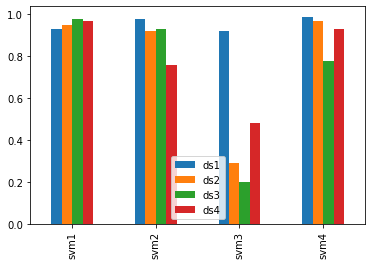

In [119]:
chart.plot.bar()